# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [1]:
import os

source = 'documents' 
lst = []
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        sep = '_'
        stripped = file.split(sep, 1)[0]
        lst.append(stripped)    

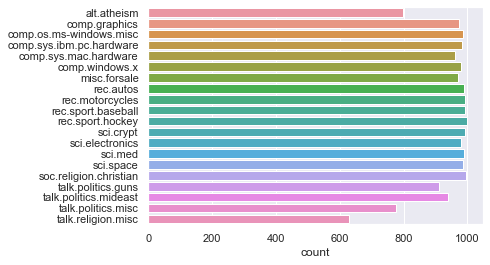

In [2]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(y=lst)

In [3]:
import os
import re
i = 0
lst = []
for filename in os.listdir('documents'):
   with open(os.path.join('documents', filename), 'r') as f:
        file_content = f.read()
        match = re.findall(r'[\w.+-]+@[\w-]+\.[\w.-]+', file_content)
        lst.append(match)

In [4]:
i = 0
sep = '@'
stripped_words = []
for lst_i in lst:
    words = []
    for word in lst_i:
        stripped = str(word).split(sep, 1)[1]
        words.append(stripped)
    stripped_words.append(words)

In [5]:
stripped_words[2]

['dbstu1.rz.tu-bs.de', 'mimsy.umd.edu', 'cs.umd.edu']

In [6]:
stripped_words_v2 = []
i=0
for lst in stripped_words:
    words = []
    stripped = []
    for word in lst:
        stripped.extend(list(str(word).split('.')))
    for stripped_word in stripped:
        if len(stripped_word)>2 and stripped_word!='com':
            words.append(stripped_word)
    stripped_words_v2.append(words)

In [7]:
string_list = []
for lst in stripped_words_v2:
    string_list.append(' '.join(lst))

print(string_list[:5])

['mantis netcom mantis', 'mantis mantis mantis', 'dbstu1 tu-bs mimsy umd edu umd edu', 'mantis kepler unh edu', 'Watson Ibm Com harder ccr-p ida org harder ccr-p ida org watson ibm']


In [8]:
len(string_list)

18828

In [9]:
preprocessed_email = string_list

In [10]:
preprocessed_email[:5]

['mantis netcom mantis',
 'mantis mantis mantis',
 'dbstu1 tu-bs mimsy umd edu umd edu',
 'mantis kepler unh edu',
 'Watson Ibm Com harder ccr-p ida org harder ccr-p ida org watson ibm']

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [11]:
preprocessed_email[:5]

['mantis netcom mantis',
 'mantis mantis mantis',
 'dbstu1 tu-bs mimsy umd edu umd edu',
 'mantis kepler unh edu',
 'Watson Ibm Com harder ccr-p ida org harder ccr-p ida org watson ibm']

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [12]:
import pandas as pd

data = pd.DataFrame(columns = ['text', 'class', 'preprocessed_text', 'preprocessed_subject', 'preprocessed_emails'])
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')

<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [13]:
data.columns

Index(['text', 'class', 'preprocessed_text', 'preprocessed_subject',
       'preprocessed_emails'],
      dtype='object')

In [15]:
data

,text,class,preprocessed_text,preprocessed_subject,preprocessed_emails


### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [38]:
import regex as re
import os
import regex as re
from bs4 import BeautifulSoup 
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


        
def preprocess(file):
    sep1 = '_'
    sep2 = '@'
    class_ = file.split(sep1, 1)[0]
    with open("documents/"+file,'r') as f:
        text = f.read()
        orignal_data = text
        
        ## BeautifulSoup is used to remove Tags from text
        #soup = BeautifulSoup(text,'lxml')
        #text = soup.get_text()
        
        
        ## This part is used to extract the email domain
        str_words = []
        match = re.findall(r'[\w.+-]+@[\w-]+\.[\w.-]+', text)
    
        for word in match:
            stripped_word = str(word).split(sep2, 1)[1]
            str_words.extend(list(str(stripped_word).split('.')))

        str_words = list(set(str_words))

        final_mail = ""
        for i in str_words:
            if len(i)>2 and i!='com':
                final_mail += " "+i
                
       

        ## Extracting Subject from the body
        if(re.findall(r'Subject:.*',text)):
            subject = re.findall(r'Subject:.*',text)
            subject = subject[0].split(":")[-1]
            subject = re.sub('[^A-Za-z0-9]+',' ',subject)
            subject = subject.lower()
        else:
            subject = " "

        
        ## removing subjects and emails 
        text = re.sub(r'Subjects:.*',"",text)
        text = re.sub(r'[\w.+-]+@[\w-]+\.[\w.-]+',"",text)
    
    
        ## Deleting all the sentances where sentence starts
        ## with "Write to:" or "From:".

        text = re.sub(r'Write to:.*',"",text)
        text = re.sub(r'From:.*',"",text)
        
        
        ## removing new line, tabs, '-',"\"
        text = re.sub(r"\s+"," ",text)
        text = re.sub(r"[/]",".",text)
        
        ## Remove words ending with ":"
        text = re.sub(r"[a-zA-Z]+:"," ",text)
        
       
        ## 10. Decontractions, replace words like below to full words. 
        ## please check the donors choose preprocessing for this 
        ## Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will
        text = re.sub(r"can\'t","can not",text)
        text = re.sub(r"\'s","is",text)
        text = re.sub(r"i\'ve'","i have",text)
        text = re.sub(r"i\'m","i am",text)
        text = re.sub(r"you\'re","you are",text)
        text = re.sub(r"i\'ll","i will",text)
        text = re.sub(r"\'d","would",text)
        
        
        ## Chunking 
        ##Referenece :- https://github.com/Atharv17/CNN-Text-/blob/main/Text%20Classification%20CNN.ipynb
        chunks = ne_chunk(pos_tag(word_tokenize(text)),binary=True)
        for i in chunks:
            if type(i)==Tree:
                if i.label()=='PERSON':
                    for j,k in i.leaves():
                        text = re.sub(r'\b{}\b'.format(j)," ",text,count=1)
                else:
                    string = ""
                    chunked_string = ""
                    for j,k in i.leaves():
                        string += j + " "
                        chunked_string += j + "_"
                        
                    string = string.strip()
                    chunked_string = chunked_string[:-1]
                    
                    text = re.sub(r"\b{}\b".format(string),chunked_string,text,count=1)
        text = re.sub(r"\s+"," ",text)

            
            
        ## Delete Number  
        text = re.sub(r"[0-9]","",text)
        
        ## Delete  _word_ type words
        text = re.sub(r"(_?)([A-Za-z0-9])(_?)",r'\2',text)
        
        ## delete oneletter word  and two letter word 
        text = re.sub(r"([A-Za-z]{1,2})(_)(A-Za-z)","\g<3>",text)
    
        ## Replace all word except A-Za-z_ 
        text = re.sub(r'[^A-Za-z_]'," ",text)
        
        ## Lowe case and remove 2 >  len(text), len(text) > 15
        text =text.lower()
        text = ' '.join([w for w in text.split() if len(w)>2 and len(w)<15])
        
    
    return orignal_data,class_,final_mail,subject,text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [39]:
import time

filename = 'alt.atheism_49960.txt'
orignal_data,class_,final_mail,subject,text = preprocess(filename)

In [41]:
orignal_data

'From: mathew <mathew@mantis.co.uk>\nSubject: Alt.Atheism FAQ: Atheist Resources\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-modified: 11 December 1992\nVersion: 1.0\n\n                              Atheist Resources\n\n                      Addresses of Atheist Organizations\n\n                                     USA\n\nFREEDOM FROM RELIGION FOUNDATION\n\nDarwin fish bumper stickers and assorted other atheist paraphernalia are\navailable from the Freedom From Religion Foundation in the US.\n\nWrite to:  FFRF, P.O. Box 750, Madison, WI 53701.\nTelephone: (608) 256-8900\n\nEVOLUTION DESIGNS\n\nEvolution Designs sell the "Darwin fish".  It\'s a fish symbol, like the ones\nChristians stick on their cars, but with feet and the word "Darwin" written\ninside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.\n\nWrite to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood,\n           CA 91605.\n\nPeople in the San Francisco Bay area c

In [42]:
class_

'alt.atheism'

In [43]:
final_mail

' mantis netcom'

In [44]:
subject

' atheist resources'

In [45]:
text

'alt atheism atheist resources archive atheism resources alt atheism archive resources last december usa freedom from religion foundation darwin fish bumper stickers and assorted other atheist paraphernalia are available from the the evolution designs evolution designs sell the darwin fish itis fish symbol like the ones christians stick their cars but with feet and the word darwin written inside the deluxe moulded plastic fish postpaid the people the area can get darwinfish from lynngold try mailing for net people who lynn directly the price per fish american atheist press aap publish various atheist books critiques the bible lists biblical contradictions and one such book the biblehandbook ball and foote isbn edition bible contradictions absurdities atrocities immoralities contains ball the aap based the king james version the bible cameronroad austin prometheus books sell books including haughtis holy horrors see below alternate address which may newer older glenn drive buffalo afric

In [46]:
lst_orignal_data = []
lst_class = []
lst_final_mail= []
lst_subject = []
lst_text = []

done = 0
for f in os.listdir('documents'):
    
    if done%1000==0:
        print(done)
    done+=1
    
    orignal_data,class_,final_mail,subject,text = preprocess(f)
    lst_orignal_data.append(orignal_data)
    lst_class.append(class_)
    lst_final_mail.append(final_mail)
    lst_subject.append(subject)
    lst_text.append(text)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000


In [47]:
set(lst_class)

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [48]:
data = pd.DataFrame(
        {'text': lst_orignal_data,
         'class': lst_class,
         'email': lst_final_mail,
         'subject': lst_subject,
         'preprocessed_text': lst_text
        })

In [49]:
data.to_pickle("./preprocessed_data.pkl")

In [50]:
data = pd.read_pickle("preprocessed_data.pkl")

In [51]:
data.head()

,text,class,email,subject,preprocessed_text
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,mantis netcom,atheist resources,alt atheism atheist resources archive atheism ...
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,mantis,introduction to atheism,alt atheism introduction atheism archive athei...
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism,edu umd tu-bs mimsy dbstu1,gospel dating,gospeldating article charleywingate well john ...
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism,edu mantis kepler unh,university violating separation of church state,university violating separation church state u...
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism,Watson ida harder ibm Com ccr-p org watson Ibm,soc motss et al princeton axes matching funds...,soc motss princeton axes matching funds for bo...
